# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

Выполнил: гр. 6132, Габбасов Раиль Ринатович

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
%pylab inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.svm import SVC

Populating the interactive namespace from numpy and matplotlib


#### Первый датасет

In [2]:
df = pd.read_csv('../data/history-of-rock-spotify.csv').drop(columns='index')
df.head()

,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [3]:
df.dtypes

name                 object
artist               object
release_date          int64
length              float64
popularity            int64
danceability        float64
acousticness        float64
danceability.1      float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [4]:
(df['danceability'] > 0.5).astype(int).value_counts()

1    2959
0    2525
Name: danceability, dtype: int64

#### Второй датасет

In [5]:
dfb = df.copy()
dfb['danceable'] = (df['danceability'] > 0.5).astype(int)
dfb = dfb.drop(columns=['danceability', 'danceability.1'])

In [6]:
dfb

,name,artist,release_date,length,popularity,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,danceable
0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,0
2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,0
3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,1
5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.006690,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853,1


**1. Многоклассовая классификация:**

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

##### 1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.


In [7]:
(df['artist'].value_counts()[:26])

Various Artists                     116
The Beatles                          84
The Rolling Stones                   58
Led Zeppelin                         52
AC/DC                                43
Bruce Springsteen                    42
Elvis Presley                        33
Pink Floyd                           31
Queen                                29
The Who                              29
Metallica                            29
Bob Dylan                            29
U2                                   28
Foo Fighters                         28
Van Halen                            26
David Bowie                          25
Elton John                           24
Red Hot Chili Peppers                23
Aerosmith                            23
KISS                                 23
Pearl Jam                            22
The Doors                            22
King Gizzard & The Lizard Wizard     21
R.E.M.                               21
Guns N' Roses                        21


In [8]:
top_artists = (df['artist'].value_counts()[6:26]).index

In [9]:
top_artists

Index(['Elvis Presley', 'Pink Floyd', 'Queen', 'The Who', 'Metallica',
       'Bob Dylan', 'U2', 'Foo Fighters', 'Van Halen', 'David Bowie',
       'Elton John', 'Red Hot Chili Peppers', 'Aerosmith', 'KISS', 'Pearl Jam',
       'The Doors', 'King Gizzard & The Lizard Wizard', 'R.E.M.',
       'Guns N' Roses', 'Eagles'],
      dtype='object')

In [10]:
df1 = df[df['artist'].isin(top_artists)]
df1

,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.28800,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
5,Hotel California - 2013 Remaster,Eagles,1976,6.522933,83,0.579,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,0.0270,147.125,4,0.609
6,Enter Sandman,Metallica,1991,5.526217,74,0.579,0.00206,0.579,0.824,0.009030,6,0.0590,-8.710,0.0300,123.331,4,0.635
8,Comfortably Numb,Pink Floyd,1979,6.371600,74,0.472,0.15000,0.472,0.366,0.308000,11,0.0837,-12.595,0.0286,127.167,4,0.171
9,One,U2,1991,4.603100,76,0.392,0.24500,0.392,0.534,0.001040,0,0.1550,-8.793,0.0369,181.305,4,0.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,Invisible Face,King Gizzard & The Lizard Wizard,2016,3.018333,37,0.405,0.05850,0.405,0.774,0.956000,9,0.1700,-6.390,0.0380,110.807,4,0.508
5478,The River,King Gizzard & The Lizard Wizard,2015,10.170883,40,0.485,0.53200,0.485,0.737,0.503000,6,0.1920,-4.553,0.0418,115.038,4,0.529
5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.00591,0.296,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.00213,0.432,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357


In [11]:
# df1 = df.drop(columns='name')

In [12]:
# df['key'].value_counts()

In [13]:
df1 = df1.drop(columns='name')
df1['artist'] = pd.factorize(df1['artist'])[0]
df1

,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
2,0,1975,5.905333,74,0.392,0.28800,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
5,1,1976,6.522933,83,0.579,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,0.0270,147.125,4,0.609
6,2,1991,5.526217,74,0.579,0.00206,0.579,0.824,0.009030,6,0.0590,-8.710,0.0300,123.331,4,0.635
8,3,1979,6.371600,74,0.472,0.15000,0.472,0.366,0.308000,11,0.0837,-12.595,0.0286,127.167,4,0.171
9,4,1991,4.603100,76,0.392,0.24500,0.392,0.534,0.001040,0,0.1550,-8.793,0.0369,181.305,4,0.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,19,2016,3.018333,37,0.405,0.05850,0.405,0.774,0.956000,9,0.1700,-6.390,0.0380,110.807,4,0.508
5478,19,2015,10.170883,40,0.485,0.53200,0.485,0.737,0.503000,6,0.1920,-4.553,0.0418,115.038,4,0.529
5479,19,2014,3.559833,47,0.296,0.00591,0.296,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
5480,19,2014,3.179750,44,0.432,0.00213,0.432,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357


In [14]:
df1.isna().sum()

artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
danceability.1      0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [15]:
y1 = df1.pop('artist')

In [16]:
# разделяем на тестовые и тренировочные данные
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(df1, y1, test_size=0.33, random_state=0)

# обучаем
model1 = GaussianNB()
model1.fit(Xtrain1, Ytrain1)

# предсказываем для тестового набора
y_pred1 = model1.predict(Xtest1)

In [17]:
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

Accuracy: 0.25


In [18]:
warnings.filterwarnings('ignore')
print(classification_report(Ytest1, y_pred1))

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.00      0.00      0.00        10
           2       1.00      0.12      0.22         8
           3       0.90      0.64      0.75        14
           4       0.00      0.00      0.00         9
           5       0.33      0.43      0.38         7
           6       0.00      0.00      0.00         9
           7       0.35      0.86      0.50         7
           8       0.09      0.71      0.16         7
           9       0.18      0.25      0.21         8
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         8
          12       0.36      0.62      0.45         8
          13       0.24      0.80      0.36         5
          14       0.00      0.00      0.00         8
          15       0.33      0.25      0.29         4
          16       0.20      0.10      0.13        10
          17       0.00    

##### 1.2 используем кросс-валидацию

In [19]:
scores = cross_val_score(model1, df1, y1, cv=3)
print("Mean score:", np.mean(scores))

Mean score: 0.2539969834087481


##### 1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

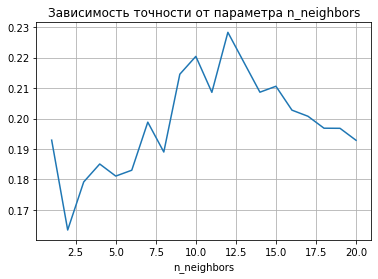

In [20]:
#Для красоты убираем предупреждение о том, что есть класс, в котором меньше 3 элементов
warnings.filterwarnings('ignore')

gr = []
rng = range(1, 21)
for i in rng:
    model2 = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(model2, df1, y1, cv=3)
    gr.append(np.mean(scores))

# строим график
plt.plot(rng, gr)
plt.title("Зависимость точности от параметра n_neighbors")
plt.xlabel("n_neighbors")
plt.grid()

##### 1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

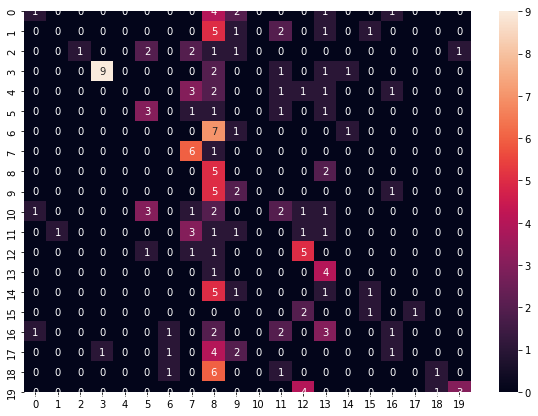

In [21]:
# строим матрицу
conf_matrix = confusion_matrix(Ytest1, y_pred1)
plt.figure(figsize = (10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d")

**2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`


In [22]:
dfb

df2 = dfb.drop(columns='name')
df2['artist'] = pd.factorize(df2['artist'])[0]
y2 = df2.pop('danceable')

In [23]:
# разбиваем на обучающие и тренировочные данные
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(df2, y2, test_size = 0.33)

In [24]:
# обучаем модель
model2 = SVC(kernel='linear')
model2.fit(Xtrain2, Ytrain2)

# предсказываем для тестового набора
y_pred2 = model2.predict(Xtest2)

print("accuracy:", accuracy_score(Ytest2, y_pred2))
print("precision:", precision_score(Ytest2, y_pred2))
print("recall:", recall_score(Ytest2, y_pred2))
print("f1:", f1_score(Ytest2, y_pred2))

accuracy: 0.7276243093922652
precision: 0.7179732313575525
recall: 0.7913593256059009
f1: 0.7528822055137845


In [25]:
print(classification_report(Ytest2, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       861
           1       0.72      0.79      0.75       949

    accuracy                           0.73      1810
   macro avg       0.73      0.72      0.72      1810
weighted avg       0.73      0.73      0.73      1810




**3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [26]:
# Для первого датасета
scaler = MinMaxScaler()
Xtrain1 = scaler.fit_transform(Xtrain1)
Xtest1 = scaler.transform(Xtest1)

# обучаем
model1 = GaussianNB()
model1.fit(Xtrain1, Ytrain1)

# предсказываем для тестового набора
y_pred = model1.predict(Xtest1)
print("Accuracy:", accuracy_score(Ytest1, y_pred))

Accuracy: 0.23809523809523808


In [27]:
print(classification_report(Ytest1, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.86      0.43      0.57        14
           4       0.00      0.00      0.00         9
           5       0.30      0.43      0.35         7
           6       0.00      0.00      0.00         9
           7       0.35      0.86      0.50         7
           8       0.08      0.71      0.15         7
           9       0.17      0.25      0.20         8
          10       0.00      0.00      0.00        11
          11       0.08      0.12      0.10         8
          12       0.33      0.62      0.43         8
          13       0.25      0.80      0.38         5
          14       0.00      0.00      0.00         8
          15       0.33      0.25      0.29         4
          16       0.33      0.20      0.25        10
          17       0.00    

In [28]:
#Для второго датасета
scaler = MinMaxScaler()
Xtrain2 = scaler.fit_transform(Xtrain2)
Xtest2 = scaler.transform(Xtest2)

In [29]:
model4 = SVC(kernel='linear')
model4.fit(Xtrain2, Ytrain2)

# предсказываем для тестового набора
y_pred = model4.predict(Xtest2)
print("Accuracy:", accuracy_score(Ytest2, y_pred))

Accuracy: 0.7265193370165746


In [30]:
print(classification_report(Ytest2, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       861
           1       0.72      0.79      0.75       949

    accuracy                           0.73      1810
   macro avg       0.73      0.72      0.72      1810
weighted avg       0.73      0.73      0.72      1810



##### Выводы
По результатам видно, что при нормализации признаков результаты изменяются незначительно. Стоит отметить, что данный датасет плохо подходит для мультиклассовой классификации, но хорошо для бинарной.